In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys
# Needed for the model class to work inside a Notebook.
os.environ["COBAYA_NOMPI"] = "True"

from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
from cobaya.model         import get_model
from cobaya.samplers.mcmc import plot_progress
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
import getdist.plots      as     gdplt
#
import os

In [3]:
info = yaml_load_file("yaml_ZeldovichTests/recsym_cubic_xiells_dbc_5.0.yaml")
print(info['params'].keys())
print(info['output'])

dict_keys(['apar', 'aperp', 'B1_bao', 'F_bao', 'SigmaFoG_bao', 'A', 'f_fac'])
chains_ZeldovichTests/recsym_cubic_xiells_dbc_5.0


array([<AxesSubplot:ylabel='$R-1$'>, <AxesSubplot:ylabel='acc. rate'>],
      dtype=object)

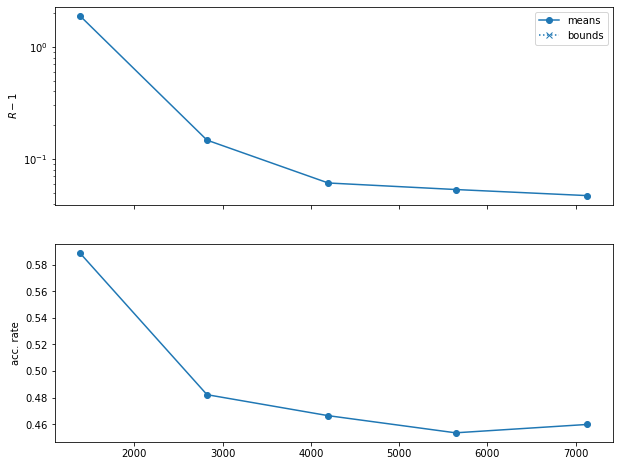

In [4]:
plot_progress(info['output'],figure_kwargs={"figsize": (10,8)})

In [41]:
root = '/global/cscratch1/sd/sfschen/CobayaBAO_DESI/chains_ZeldovichTests/recsym_cubic_xiells_'

samples = loadMCSamples(root + 'am', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })


samples_1p0 = loadMCSamples(root + 'dbc_1.0', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })

samples_2p0 = loadMCSamples(root + 'dbc_2.0', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })

samples_5p0 = loadMCSamples(root + 'dbc_5.0', no_cache=True, \
                        settings={'ignore_rows':0.5
                        })




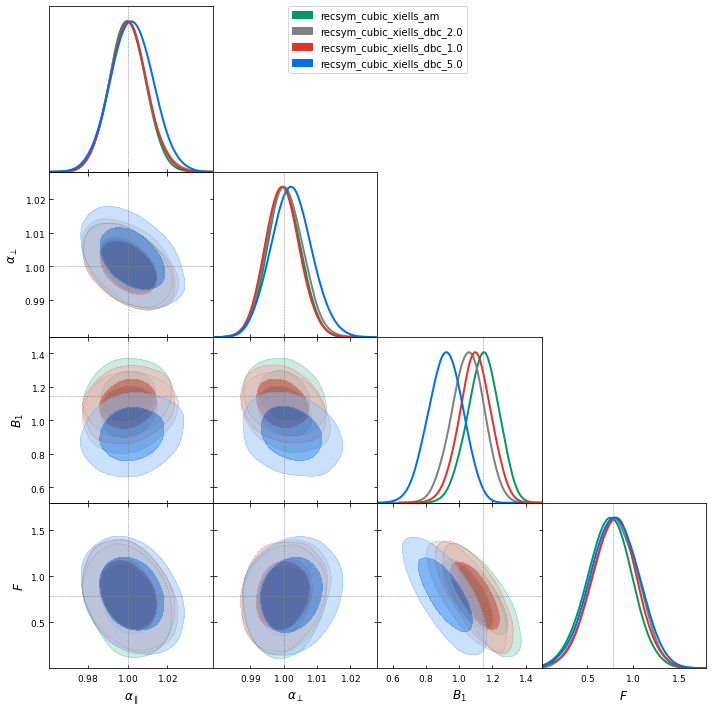

In [42]:
gdplot = gdplt.get_subplot_plotter(subplot_size=2.5)

params = ['apar', 'aperp', 'B1_bao', 'F_bao']

gdplot.triangle_plot([samples, samples_2p0, samples_1p0, samples_5p0],\
                     params,\
                     filled=True,\
                     contour_lws=2, title_limit=0,\
                     alphas = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5],\
                     markers={'apar': 1.0, 'aperp':1.0, 'B1_bao': 1.1453427999999999, 'F_bao': 0.77740741},\
                     figure_kwargs={"figsize": (15,15)})

In [49]:
tabs = samples_5p0.getParams()

bf = np.argmin(tabs.chi2)
bf_chi2 = tabs.chi2[bf]

bf_params = {}

for param in info['params'].keys():
    # Only add to list if sampled
    if 'ref' in info['params'][param].keys():
        bf_params[param] = getattr(tabs, param)[bf]
        
print(bf_params)
print(bf_chi2)

{'apar': 1.0031546, 'aperp': 1.0015138000000001, 'B1_bao': 0.93397967, 'F_bao': 0.77319014}
443.68697000000003


In [44]:
chains = [samples, samples_1p0, samples_2p0, samples_5p0]

for chain in chains:
    
    print(chain.getName())
    print(chain.getInlineLatex('apar'))
    print(chain.getInlineLatex('aperp'))
    print(chain.getCorrelationMatrix()[0,1])
    
    print('')


recsym_cubic_xiells_am
\alpha_\parallel = 1.0000\pm 0.0091
\alpha_\perp = 1.0002\pm 0.0051
-0.42384166120377476

recsym_cubic_xiells_dbc_1.0
\alpha_\parallel = 1.0004\pm 0.0094
\alpha_\perp = 0.9997\pm 0.0052
-0.4169666213621653

recsym_cubic_xiells_dbc_2.0
\alpha_\parallel = 1.0005\pm 0.0097
\alpha_\perp = 1.0004\pm 0.0055
-0.42412291274025415

recsym_cubic_xiells_dbc_5.0
\alpha_\parallel = 1.002\pm 0.011
\alpha_\perp = 1.0023\pm 0.0061
-0.4213523648226713



In [45]:
bf_chi2

443.68697000000003

In [46]:
samples.getCorrelationMatrix()[:4,:4]

array([[ 1.        , -0.42384166,  0.12498694, -0.23438294],
       [-0.42384166,  1.        , -0.19851541,  0.09449498],
       [ 0.12498694, -0.19851541,  1.        , -0.71961297],
       [-0.23438294,  0.09449498, -0.71961297,  1.        ]])

In [47]:
import sys
sys.path.append('./lss_likelihood/')

In [48]:
model= get_model(info)
lik = model.likelihood['bao_zeldovich_likelihood_flex_am.ZeldovichBAOLikelihood']

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'stop_on_error']
(100,)
(100, 100)


In [50]:
model.logposterior(bf_params)

LogPosterior(logpost=-225.06235989737328, logpriors=[-3.2188758248682006], loglikes=array([-221.84348407]), derived=[])

In [51]:
model.logposterior(bf_params)
bf_obs = lik.get_best_fit()

In [52]:
#tt = lik.bao_predict('bao', thetas=lik.linear_param_means)
#obs = lik.bao_observe(tt)

In [53]:
#M = lik.binmat

In [54]:
bf_params

{'apar': 1.0031546,
 'aperp': 1.0015138000000001,
 'B1_bao': 0.93397967,
 'F_bao': 0.77319014}

In [20]:
#np.savetxt('r_theory.txt', tt[:,0])
#np.savetxt('binmat.txt', M)

In [55]:
rdats = lik.xdat
xi0dat = lik.y0dat
xi2dat = lik.y2dat

(-10.0, 80.0)

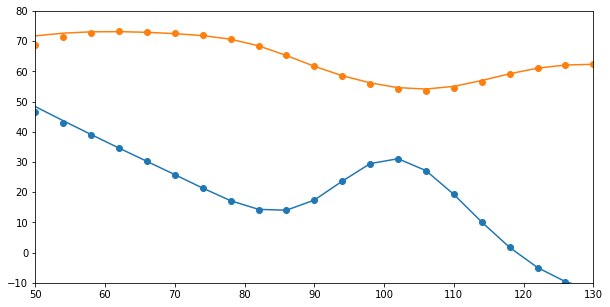

In [58]:
plt.figure(figsize=(10,5))

plt.plot(rdats, rdats**2 * xi0dat, 'o')
plt.plot(rdats, -rdats**2 * xi2dat, 'o')

plt.plot(rdats, rdats**2 * bf_obs[:50], 'C0')
plt.plot(rdats, -rdats**2 * bf_obs[50:], 'C1')


plt.xlim(50,130)
plt.ylim(-10,80)

In [23]:
params

{'apar': 1.0,
 'aperp': 1.0,
 'B1_bao': 1.1453427999999999,
 'F_bao': 0.77740741,
 'SigmaFoG_bao': 25.0,
 'A': 1.0,
 'f_fac': 1.0}

In [24]:
lik.Zel

{'R': 15.0,
 'fz': 0.8315978342939394,
 'klin': array([1.00000000e-03, 1.00461810e-03, 1.00925754e-03, ...,
        9.90827380e+00, 9.95403124e+00, 1.00000000e+01]),
 'pnw': array([1.69434769e+03, 1.70160031e+03, 1.70888196e+03, ...,
        1.01147402e-01, 9.90352829e-02, 9.87661435e-02]),
 'pw': array([ 6.27505901e-01,  6.68220320e-01,  7.09445939e-01, ...,
         1.72592009e-05,  9.18936256e-04, -7.92723764e-06]),
 'sigmas': (10.556307852555234,
  9.45499094916356,
  10.565115328400125,
  13.777685164072894,
  0.03123000341125935)}